Notebook where code is developed to add continous time finite state markov chains to geometric brownian motion. Starts with a two state system, then generalises for any finite number of states.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.lines import Line2D
from scipy.special import erfinv, erf
from scipy.optimize import minimize_scalar

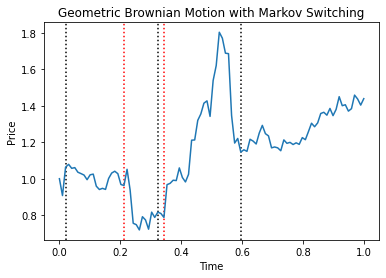

In [5]:
t = np.linspace(0,1,100)
step = t[1]-t[0]
mu = 0.1
sigma = 1
s0 = 1

lambda1 = 2
lambda2 = 1


Q = np.array([[-1,1],[-2,2]])


z = np.random.exponential(lambda1)
count=0
s = []
s.append(s0)

for i in range(len(t)-1):
    count+=step*10
    if count > z:
        if sigma ==0.25 and count != 0:
            z=np.random.exponential(lambda2)
            sigma = 1
            count =0

            plt.axvline(t[i],color="red", linestyle=":")
        
        if sigma == 1 and count != 0:
            z= np.random.exponential(lambda1)
            sigma =0.25
            count = 0
            
            plt.axvline(t[i],color="black", linestyle=":")
            
    eta = np.random.normal(0,1)
    snext = s[i] * np.exp((mu- 0.5 * sigma**2)*step + sigma*np.sqrt(step)*eta)
    s.append(snext)
    

plt.plot(t,s)
plt.title('Geometric Brownian Motion with Markov Switching')
plt.xlabel('Time')
plt.ylabel('Price')
#plt.legend()
plt.show()

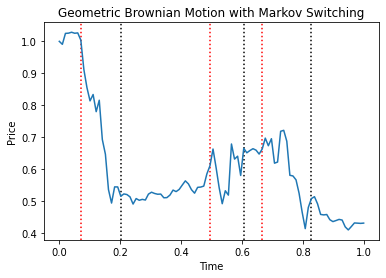

In [6]:
t = np.linspace(0,1,100)
step = t[1]-t[0]
mu = 0.1
sigma = 0.25
s0 = 1
count = 0
lambda1 = 0.2
lambda2 = 0.1

Q = np.array([[-1,1],[2,-2]])
z = np.random.exponential(lambda1)

s = []
s.append(s0)

for i in range(len(t)-1):
    count += step
    if count > z:
        if sigma ==0.25 and count != 0:
            z=np.random.exponential(lambda2)
            sigma = 1
            count =0

            plt.axvline(t[i],color="red", linestyle=":")
        
        if sigma == 1 and count != 0:
            z= np.random.exponential(lambda1)
            sigma =0.25
            count = 0
            
            plt.axvline(t[i],color="black", linestyle=":")
            
    eta = np.random.normal(0,1)
    snext = s[i] * np.exp((mu- 0.5 * sigma**2)*step + sigma*np.sqrt(step)*eta)
    s.append(snext)
    

plt.plot(t,s)
plt.title('Geometric Brownian Motion with Markov Switching')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

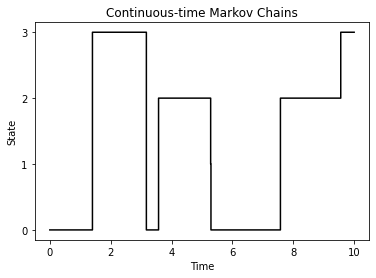

In [9]:
Q = np.array([[-9, 3, 3,3],
              [4, -24, 8,12],
              [15, 3, -24,6],
              [5, 10,5, -25]])

states = [0,1,2,3]
current = 0
state = []
z = np.random.exponential(abs(Q[current][current]))
t = np.linspace(0,10,1000)
step = t[1]-t[0]
length = 0
for i in range(len(t)):
    state.append(current)
    length += step*10
    if length >= z:    
        length=0
        ps = Q[current] / abs(Q[current][current])
        runiform = np.random.uniform(0,1)
        prob = 0
        ind= -1
        for p in ps:
            ind += 1    
            if p >0:
                prob += p
                if runiform <= prob:
                    z = np.random.exponential(abs(Q[ind][ind]))
                    current = states[ind]
                    break



plt.step(t,state,color='black')
plt.title('Continuous-time Markov Chains')
plt.xlabel('Time')
plt.yticks(states)
plt.ylabel('State')
plt.show()

The following code creates a plot for a four state system where each vertical line represents a change in state and the corresponding colour refers to which state the system is changing in to. 

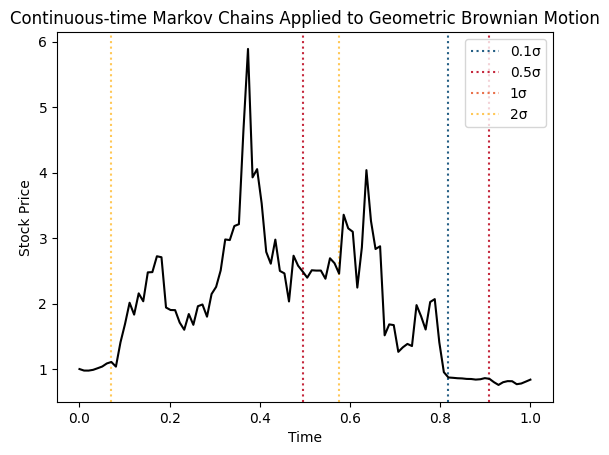

In [3]:
Q = np.array([[-9, 3, 3,3],
              [4, -24, 8,12],
              [15, 3, -24,6],
              [10, 10, 5, -25]])

sigmas = [0.1,0.5,1,2]
states = [0,1,2,3]
current = states[0]

colours = ['#255F85','#C5283D','#E9724C','#FFC857']

mu = 0.1
sigma = 0.25
s0 = 1

z = np.random.exponential(abs(Q[current][current]))
t = np.linspace(0,1,100)
step = t[1]-t[0]

length = 0

s=[]
s.append(s0)
for i in range(len(t)-1):
    length += step*75

    if length >= z:    
        length=0
        ps = Q[current] / abs(Q[current][current])
        runiform = np.random.uniform(0,1)
        prob = 0
        ind= -1
        for p in ps:
            ind += 1    
            if p >0:
                prob += p
                if runiform <= prob:
                    z = np.random.exponential(abs(Q[ind][ind]))
                    current = states[ind]
                    sigma = sigmas[ind]
                    plt.axvline(t[i],color=colours[ind], linestyle=":")
                    break
    
    eta = np.random.normal(0,1)
    snext = s[-1] * np.exp((mu- 0.5 * sigma**2)*step + sigma*np.sqrt(step)*eta)
    s.append(snext)


line1 = Line2D([0,1],[0,1],linestyle=':', color=colours[0])
line2 = Line2D([0,1],[0,1],linestyle=':', color=colours[1])
line3 = Line2D([0,1],[0,1],linestyle=':', color=colours[2])
line4 = Line2D([0,1],[0,1],linestyle=':', color=colours[3])



plt.plot(t,s,color='black')
plt.title('Continuous-time Markov Chains Applied to Geometric Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend([line1,line2,line3,line4],['0.1σ','0.5σ','1σ','2σ'])
plt.show()

In [ ]:
def GBM_WS(mu,sigmas,T,s0,Q):
    t= np.linspace(0,T,100)
    step=T/len(t)
    stock = s0
    sigma = sigmas[0]
    states = range(len(Q))
    current=states[0]
    z = np.random.exponential(abs(Q[current][current]))
    length = 0
    for i in range(len(t)-1):
        length += step
        if length >= z:    
            length=0
            ps = Q[current] / abs(Q[current][current])
            runiform = np.random.uniform(0,1)
            prob = 0
            ind= -1
            for p in ps:
                ind += 1    
                if p >0:
                    prob += p
                    if runiform <= prob:
                        z = np.random.exponential(abs(Q[ind][ind]))
                        current = states[ind]
                        sigma = sigmas[ind]
                        break
        eta = np.random.normal(0,1)
        stock = stock * np.exp((mu- 0.5 * sigma**2)*step + sigma*np.sqrt(step)*eta)
    return stock

In [10]:
#Improved function see GBMWS.ipynb.
def GBM_WS(mu,sigmas,T,s0,Q):
    t = np.linspace(0, T, 100) 
    step = T/len(t)
    stock = s0
    states = list(range(len(Q)))
    current = np.random.choice(states,p=[1,0]) 
    sigma = sigmas[current]
    z = np.random.exponential(1 / abs(Q[current][current]))
    length = 0
    for i in range(len(t)):
        length += step
        if length >= z:
            length = 0
            p = Q[current] / abs(Q[current][current]) 
            probs = [pr if pr >= 0 else 0 for pr in p]
            current = np.random.choice(states, p=probs)
            sigma = sigmas[current]
            z = np.random.exponential(1 / abs(Q[current][current]))
        eta = np.random.normal(0, 1)
        stock = stock * np.exp((mu- 0.5 * sigma**2)*step + sigma*np.sqrt(step)*eta)
    return stock